# Combine rating files

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os

In [5]:
rating_file_path = '../resources/ratings/'
movie_file = '../test.csv'

In [16]:
for file_name in os.listdir(rating_file_path):
    file_path = os.path.join(rating_file_path, file_name)
    print(file_path)
    try:
        df = pd.read_csv(file_path, names=["user_id", "film_ids", "rating"])
    except Exception as e:
        print(f"Error in file: {file_name}")

../resources/ratings/users_ratings_part1.csv
../resources/ratings/users_ratings_part10.csv
../resources/ratings/users_ratings_part2.csv
../resources/ratings/users_ratings_part21.csv
../resources/ratings/users_ratings_part22.csv
../resources/ratings/users_ratings_part23.csv
../resources/ratings/users_ratings_part24.csv
../resources/ratings/users_ratings_part25.csv
../resources/ratings/users_ratings_part26.csv
../resources/ratings/users_ratings_part27.csv
../resources/ratings/users_ratings_part28.csv
../resources/ratings/users_ratings_part29.csv
../resources/ratings/users_ratings_part3.csv
../resources/ratings/users_ratings_part30.csv
../resources/ratings/users_ratings_part4.csv
../resources/ratings/users_ratings_part41.csv
../resources/ratings/users_ratings_part42.csv
../resources/ratings/users_ratings_part43.csv
../resources/ratings/users_ratings_part44.csv
../resources/ratings/users_ratings_part45.csv
../resources/ratings/users_ratings_part46.csv
../resources/ratings/users_ratings_par

In [17]:
file_path = '../resources/ratings/users_ratings_part48.csv'

with open(file_path, 'r') as f:
    for i, line in enumerate(f, start=1):
        try:
            # Attempt to parse the line
            values = line.strip().split(',')  # Adjust the delimiter if needed
            if len(values) != 3:  # Check if the line has the expected number of fields
                print(f"Line {i} has an issue: {line.strip()}")
        except Exception as e:
            print(f"Error on line {i}: {e}")

Line 110686 has an issue: 47671093,5078188,70460714,0241527,1


In [ ]:
dataframes = []
for file_name in os.listdir(rating_file_path):
    file_path = os.path.join(rating_file_path, file_name)
    
    if file_name.endswith('.csv'):
        df = pd.read_csv(file_path, names=["user_id", "film_ids", "rating"])
        dataframes.append(df)

combined_dataset = pd.concat(dataframes, ignore_index=True)

print(combined_dataset.head())

combined_dataset.to_csv('../resources/combined_ratings.csv', index=False)


    user_id  film_ids  rating
0  26505598   1375666       7
1  26505598    361748       9
2  26505598     76759       9
3  26505598    482571       8
4  26505598    499549       6


# Data Analysis

In [27]:
rating_file = '../resources/combined_ratings.csv'
movie_file = '../test.csv'

In [37]:
# import csv

# input_file = "../test.csv"
# output_file = "../fixed_movies.csv"

# with open(input_file, "r", encoding="utf-8") as infile, open(output_file, "w", encoding="utf-8", newline="") as outfile:
#     reader = csv.reader(infile)
#     writer = csv.writer(outfile, quoting=csv.QUOTE_MINIMAL)  # Minimal quoting

#     for row in reader:
#         # Process each field to ensure proper escaping
#         sanitized_row = []
#         for field in row:
#             if isinstance(field, str):
#                 # Escape double quotes inside the field
#                 field = field.replace('"', '""')
#                 # Ensure the field is quoted only if necessary (CSV writer will handle this)
#             sanitized_row.append(field)

#         # Write the sanitized row
#         writer.writerow(sanitized_row)


In [44]:
ratings = pd.read_csv(rating_file)
movies = pd.read_csv(movie_file)
movies.head()


,fid,name,description,ratingCount,ratingValue,contentRating,genre,keywords,duration
0,80684,Star Wars: Episode V - The Empire Strikes Back,After the Empire overpowers the Rebel Alliance...,1414138,8.7,PG,"Action,Adventure,Fantasy","famous twist,part of trilogy,rescue,cave,darth...",7440
1,114814,The Usual Suspects,The sole survivor of a pier shoot-out tells th...,1169696,8.5,R,"Crime,Drama,Mystery","surprise ending,criminal mastermind,criminal,u...",6360
2,99685,Goodfellas,The story of Henry Hill and his life in the ma...,1295369,8.7,C18,"Biography,Crime,Drama","gangster,mafia,organized crime,rise and fall,m...",8700
3,120815,Saving Private Ryan,"Following the Normandy Landings, a group of U....",1537912,8.6,R,"Drama,War","world war two,d day,u.s. army,prisoner of war,...",10140
4,88763,Back to the Future,"Marty McFly, a 17-year-old high school student...",1347467,8.5,PG,"Adventure,Comedy,Sci-Fi","time travel,time machine,delorean,1980s,1950s",6960


In [59]:
movies.isna().sum()


fid              0
name             0
description      0
ratingCount      0
ratingValue      0
contentRating    0
genre            0
keywords         0
duration         0
dtype: int64

In [60]:
ratings.isna().sum()

user_id     0
film_ids    0
rating      0
dtype: int64

In [61]:
movies.dtypes

fid                int64
name              object
description       object
ratingCount        int64
ratingValue      float64
contentRating     object
genre             object
keywords          object
duration           int64
dtype: object

In [62]:
ratings.dtypes

user_id     int64
film_ids    int64
rating      int64
dtype: object

In [46]:
user_rating_count = ratings['user_id'].value_counts().to_numpy()
user_rating_count

array([11250, 10750, 10545, ...,     2,     2,     2], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


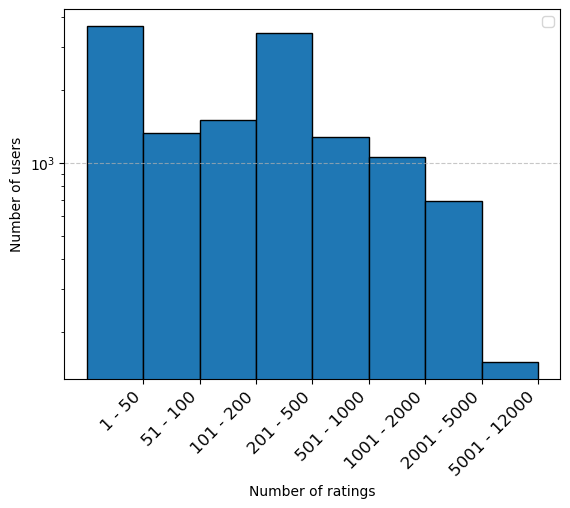

In [67]:
data = user_rating_count

bins = [0, 50, 100, 200, 500, 1000, 2000, 5000, 12000]

hist, bin_edges = np.histogram(data,bins)

fig,ax = plt.subplots()

ax.bar(range(len(hist)),hist,width=1,edgecolor='black')


ax.set_xticks([0.5+i for i,j in enumerate(hist)])
ax.set_yscale('log')

ax.set_xticklabels(['{} - {}'.format(bins[i]+1,bins[i+1]) for i,j in enumerate(hist)], rotation=45, ha='right', fontsize=12)

plt.grid(axis='y', linestyle = '--', alpha = 0.7)

plt.legend()

plt.ylabel('Number of users')
plt.xlabel('Number of ratings')



plt.show()

In [51]:
avg_ratings = ratings.groupby('user_id')['rating'].mean().to_numpy()
avg_ratings

array([9.8       , 7.77536232, 6.51804813, ..., 8.        , 7.5       ,
       7.        ])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


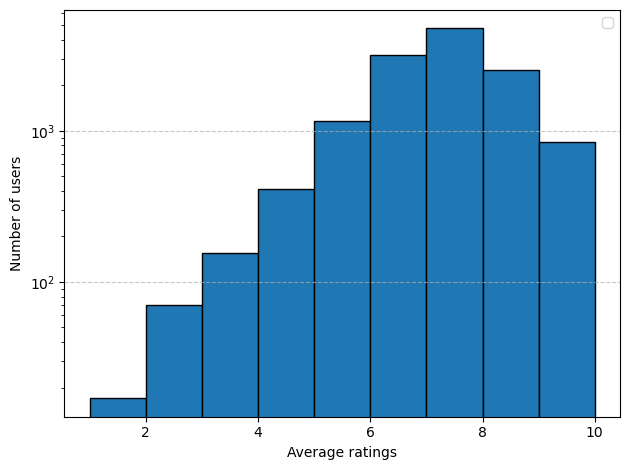

In [79]:
# Average ratings per users
data = avg_ratings

bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

plt.hist(data,bins = bins, edgecolor='black', log=True)

plt.legend()

plt.xlabel('Average ratings')
plt.ylabel('Number of users')
plt.grid(axis='y', linestyle = '--', alpha = 0.7)

plt.tight_layout()

plt.show()

In [82]:
movie_ratings_avg = ratings.groupby('film_ids')['rating'].mean().to_numpy()
movie_ratings_cnt = ratings.groupby('film_ids')['rating'].count().to_numpy()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


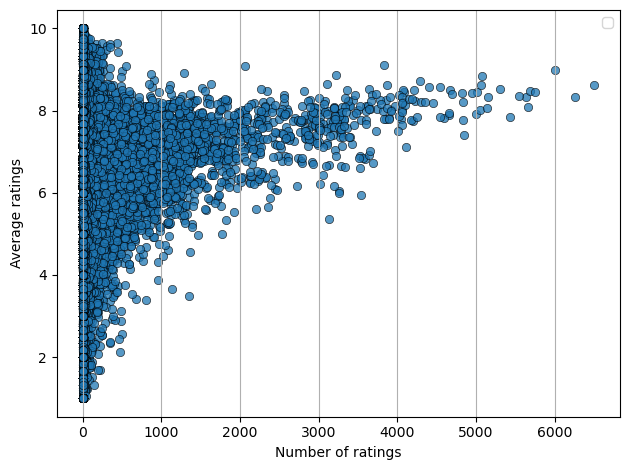

In [83]:
plt.scatter(movie_ratings_cnt, movie_ratings_avg,
            edgecolor='black', linewidth=0.5, alpha=0.75)

plt.legend()

plt.xlabel('Number of ratings')
plt.ylabel('Average ratings')
plt.grid(axis='x')

plt.tight_layout()

plt.show()

In [85]:
genres_df = movies['genre'].str.get_dummies(',')
genres_series = genres_df.sum(axis=0)
genre_name = genres_series.index.to_numpy()
genre_cnt = genres_series.to_numpy()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


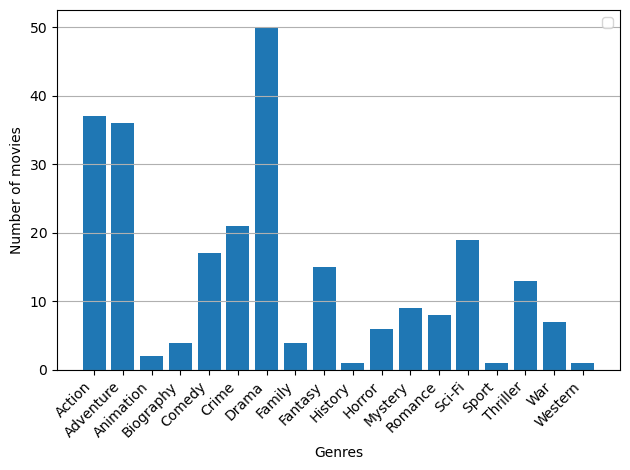

In [86]:
# Movies’ genres count
plt.bar(genre_name, genre_cnt)

plt.legend()

plt.xlabel('Genres')
plt.ylabel('Number of movies')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()

plt.show()